In [4]:
from pymongo import MongoClient
import matplotlib.pyplot as plt
import pandas as pd
client = MongoClient('localhost', 27017)
db = client.hotels
reviews_collection= db.yelp_reviews
users_collection= db.yelp_users

In [5]:
def origin_of_users():
    origin = reviews_collection.aggregate(
    [
        { 
            "$lookup" : {
                "from" : "yelp_users", 
                "localField" : "_user_id", 
                "foreignField" : "_id", 
                "as" : "user"
            }
        }, 
        { 
            "$project" : {
                "_id" : "$Hotel_name", 
                "usr_location" : "$user.user_loc"
            }
        }
    ], 
    );
    return origin

In [70]:
ori = pd.DataFrame(list(origin_of_users()))
for index, row in ori.iterrows():
   k = str(row['usr_location']).strip('['']')
   j = k.strip('\'\'')
   if (len(j.split(',')) > 1 ):
       j = j.split(',')[1] 
   else: 
       j = j.split(',')[0] 
   row['usr_location'] = j


In [84]:
#print(ori)
df_countries = ori.groupby(['usr_location']).count()
print(df_hotels)
#ori['country'] = pd.Series(ori['usr_location']).str.split(',').str[1]
#print(ori.head())

                 _id
usr_location        
 australia        10
 canada           11
 dc                1
 italy             1
 los angeles       2
 melbourne         1
 munich            1
 new york          1
 new zealand       2
 singapore         5
 switzerland       1
 taiwan            1
 united kingdom    4
 united states   197
australia          1
hong kong          2
singapore         23


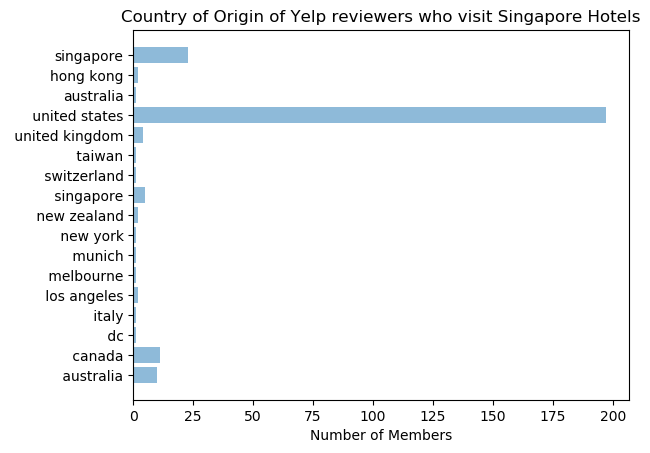

In [87]:
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt
 
members = df_countries.index
y_pos = np.arange(len(members))
counts = df_countries['_id']
 
plt.barh(y_pos, counts, align='center', alpha=0.5)
plt.yticks(y_pos, members)
plt.xlabel('Number of Members')
plt.title('Country of Origin of Yelp reviewers who visit Singapore Hotels')
 
plt.show()

In [100]:
#print(ori)
ori.to_csv('country_hotels.csv')

In [107]:
def reviewReliability():
    origin = reviews_collection.aggregate(
    [
        { 
            "$lookup" : {
                "from" : "yelp_users", 
                "localField" : "_user_id", 
                "foreignField" : "_id", 
                "as" : "user"
            }
        }, 
        { 
            "$project" : {
                "_id" : "$Hotel_name",
                "total_useful_upvote": "$total_useful_upvote",
                "membstat" : "$user.is_elite",
                "total_reviews":"$user.total_user_reviews"
            }
        }
    ], 
    );
    return origin

In [125]:
df_reliability = pd.DataFrame(list(reviewReliability()))
for index, row in df_reliability.iterrows():
   k = str(row['membstat']).strip('['']')
   j = str(row['total_reviews']).strip('['']')
   
   #print(k)
   
   k = k.strip('\'\'')
   j = j.strip('\'\'')
   
   #print(k)
   k = k.split(' ')[0]
   j = j.split(' ')[0]
   
   row['membstat'] = k
   row['total_reviews'] = j

In [126]:
df_reliability.to_csv('reviewers_per_hotel.csv')